CLUSTERING

preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("/content/EastWestAirlines.csv")
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
data.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [6]:
data.duplicated().sum()

0

In [7]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

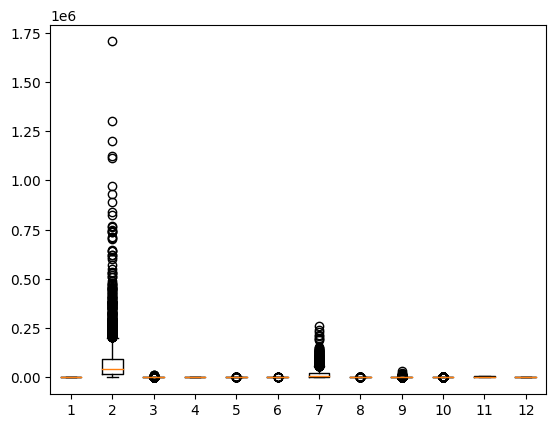

In [8]:
plt.boxplot(data)
plt.show()

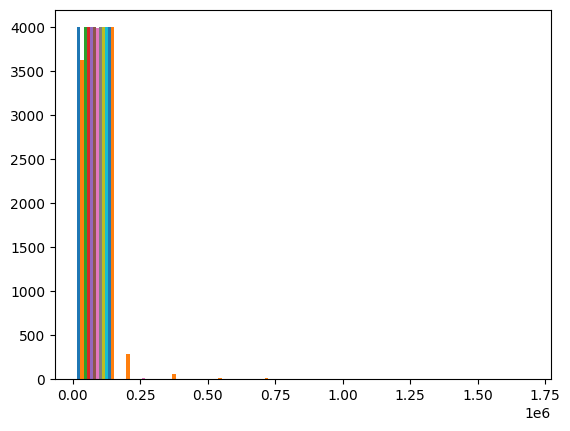

In [9]:
plt.hist(data)
plt.show()

In [10]:
correlation=data.corr()
correlation

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


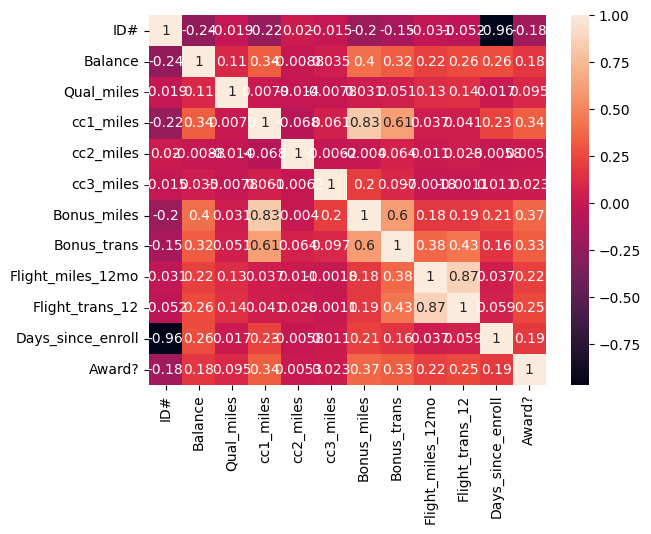

In [11]:
import seaborn as sns
sns.heatmap(correlation,annot=True)
plt.show()

2. implementing clustering algorithem

k mean clustering

In [12]:
from sklearn.cluster import KMeans

In [13]:
k=3 #assume the optimal value of k is 3
kmeans = KMeans(n_clusters= k) #intialize
kmeans.fit(data)#fit the model


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [14]:
centroids=kmeans.cluster_centers_ #get the centroids
centroids

array([[1.54019891e+03, 1.83113328e+05, 2.86867847e+02, 3.03678474e+00,
        1.00953678e+00, 1.02997275e+00, 3.53690381e+04, 1.74713896e+01,
        9.70006812e+02, 2.81471390e+00, 4.99625341e+03, 5.01362398e-01],
       [9.18618182e+02, 6.47102218e+05, 5.23309091e+02, 3.16363636e+00,
        1.01818182e+00, 1.05454545e+00, 5.03299818e+04, 2.03090909e+01,
        1.63230909e+03, 5.70909091e+00, 6.27418182e+03, 7.81818182e-01],
       [2.14212866e+03, 3.87339265e+04, 1.04975389e+02, 1.81713396e+00,
        1.01557632e+00, 1.00747664e+00, 1.24091019e+04, 1.01105919e+01,
        3.23364798e+02, 9.69781931e-01, 3.88093115e+03, 3.33333333e-01]])

In [15]:
labels=kmeans.labels_ #get the labels
labels

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [16]:
data["Cluster"]=labels #add the labels to the data
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


visualization

In [17]:
cluster_counts=data["Cluster"].value_counts().sort_index()
cluster_counts

,count
Cluster,
0,733
1,55
2,3211


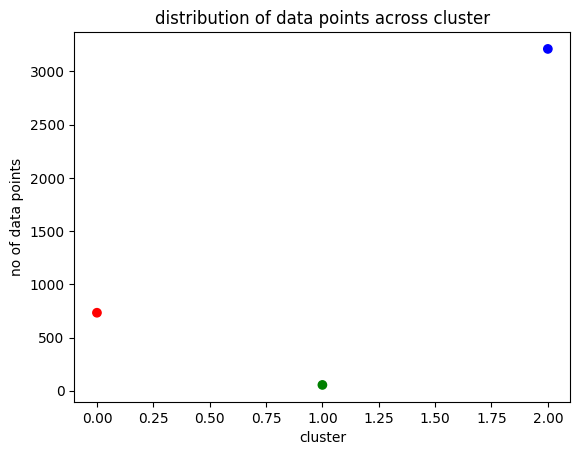

In [18]:
color=["r","g","b"]
plt.scatter(cluster_counts.index,cluster_counts.values,color=color)
plt.xlabel("cluster")
plt.ylabel("no of data points")
plt.title("distribution of data points across cluster")
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for K-Means
silhouette_kmeans = silhouette_score(data,labels)
#labels=kmean.labels_
print("Silhouette Score for K-Means:", silhouette_kmeans)


Silhouette Score for K-Means: 0.6447278986746138


DBSCAN algorithem

In [20]:
from sklearn.cluster import DBSCAN

eps = 0.5  # epsilon, the maximum distance between two samples for them to be considered as in the same neighborhood
min_samples = 5  # minimum number of samples in a neighborhood for a point to be considered as a core point

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data)

DBSCAN()

In [21]:
# Get cluster labels for each data point
labels = dbscan.labels_
labels


array([-1, -1, -1, ..., -1, -1, -1])

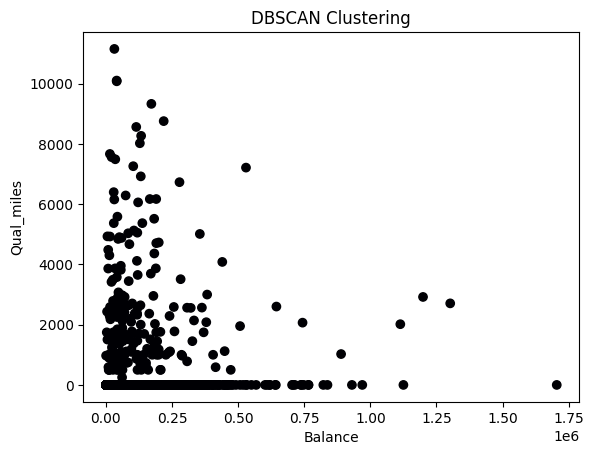

In [22]:
import matplotlib.pyplot as plt

# Visualize clusters (2D example)
plt.scatter(data['Balance'], data['Qual_miles'], c=labels, cmap='magma')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.title('DBSCAN Clustering')
plt.show()


In [23]:
x=data.iloc[:,[2,3]]
x

,Qual_miles,cc1_miles
0,0,1
1,0,1
2,0,1
3,0,1
4,0,4
...,...,...
3994,0,1
3995,0,1
3996,0,3
3997,0,1


In [24]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')
db


DBSCAN(eps=3, min_samples=4)

In [25]:
model=db.fit(x)

In [26]:
label=model.labels_
label

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
from sklearn import metrics
import numpy as np
#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True
print(sample_cores)

#Calculating the number of clusters

n_clusters=len(set(label))-(1 if -1 in label else 0)
print('No of clusters:',n_clusters)

[ True  True  True ...  True  True  True]
No of clusters: 6


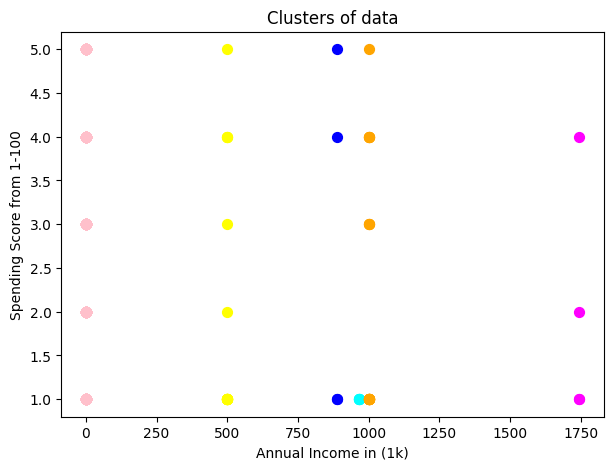

In [32]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x.iloc[y_means == 0, 0], x.iloc[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x.iloc[y_means == 1, 0], x.iloc[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x.iloc[y_means == 2, 0], x.iloc[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x.iloc[y_means == 3, 0], x.iloc[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x.iloc[y_means == 4, 0], x.iloc[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x.iloc[y_means == 5, 0], x.iloc[y_means == 5, 1], s = 50, c = 'blue')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()

In [38]:
#calculate silhoutte score for dbscan
from sklearn.metrics import silhouette_score
silhouette_dbscan=silhouette_score(data,db.labels_)
print("silhoutte score for dbscan:",silhouette_dbscan)


silhoutte score for dbscan: -0.2385464060326154


hierarical clustering

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [44]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
scaled_data

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.39545434e+00, -7.66919299e-01,  4.90095400e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.37995704e+00, -7.66919299e-01,  4.90095400e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.41192021e+00, -7.66919299e-01,  4.90095400e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  4.90095400e-01],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  4.90095400e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  4.90095400e-01]])

In [48]:
#perform hierarichal clustering
#you can adjust parameter like linkage method and number of clusters as needed
model=AgglomerativeClustering(n_clusters=5,linkage='ward')
cluster=model.fit_predict(scaled_data)
print(cluster)

[2 2 2 ... 1 2 2]


In [55]:
#add cluster label to the original data set
data['cluster']=cluster

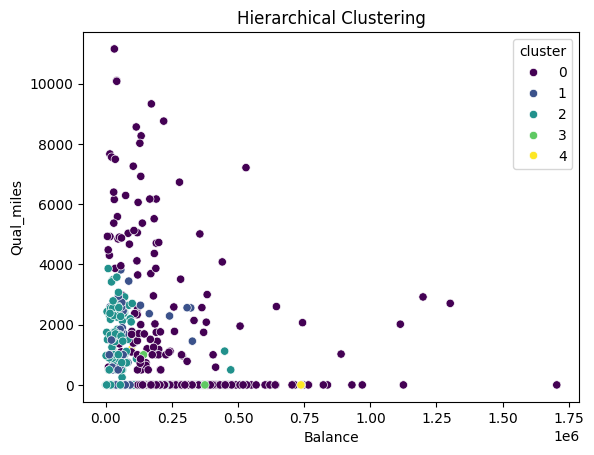

In [54]:
sns.scatterplot(data=data,x='Balance', y='Qual_miles',hue = 'cluster',palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.ylabel('Qual_miles')
plt.show()